In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import chi2
from scipy.special import psi
from math import log

from scipy.stats import gamma
from scipy.stats import lognorm
from fitter import Fitter

In [2]:
data_ff = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/stratified/florestal/20m/FF_20170112_20m_patches.csv')
data_fs = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/stratified/savanica/20m/FS_20170112_20m_patches.csv')
data_fc = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/stratified/campestre/20m/FC_20170112_20m_patches.csv')

In [3]:
dprvi_patches = data_ff.filter(regex='^dprvi_patch', axis=1)
prvi_patches = data_fs.filter(regex='^prvi_patch', axis=1)
dpsvi_patches = data_fc.filter(regex='^dpsvi_patch', axis=1)
dpsvim_patches = data_ff.filter(regex='^dpsvim_patch', axis=1)
rvi_patches = data_fs.filter(regex='^rvi_patch', axis=1)

In [4]:
dprvi_patches

,dprvi_patch_0,dprvi_patch_1,dprvi_patch_2,dprvi_patch_3,dprvi_patch_4,dprvi_patch_5,dprvi_patch_6,dprvi_patch_7,dprvi_patch_8,dprvi_patch_9,...,dprvi_patch_40,dprvi_patch_41,dprvi_patch_42,dprvi_patch_43,dprvi_patch_44,dprvi_patch_45,dprvi_patch_46,dprvi_patch_47,dprvi_patch_48,dprvi_patch_49
0,0.556535,0.629658,0.762799,0.619999,0.694557,0.910229,0.411076,0.431987,0.409884,0.400999,...,0.528873,0.294325,0.503696,0.727769,0.496201,0.725669,0.542709,0.680539,0.732911,0.749867
1,0.526675,0.554087,0.762189,0.721168,0.705757,0.886579,0.529943,0.526788,0.440708,0.350456,...,0.539017,0.189560,0.485127,0.704249,0.498207,0.811087,0.484943,0.654759,0.633917,0.741768
2,0.369024,0.466645,0.736125,0.850786,0.634442,0.891474,0.575657,0.569084,0.523063,0.391744,...,0.518369,0.600791,0.439421,0.700223,0.617210,0.883486,0.498543,0.665546,0.806674,0.829041
3,0.538555,0.423124,0.622705,0.936778,0.585927,0.876961,0.555154,0.545161,0.531219,0.460562,...,0.544864,0.656074,0.343722,0.711247,0.585724,0.894235,0.477610,0.675357,0.858052,0.843561
4,0.785722,0.312898,0.528981,0.929705,0.508241,0.712639,0.451033,0.502088,0.598363,0.594110,...,0.561134,0.633522,0.392252,0.568742,0.627264,0.924679,0.465834,0.487154,0.930491,0.708198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.441925,0.484142,0.641600,0.553137,0.435253,0.460414,0.443053,0.435132,0.762932,0.592060,...,0.653678,0.680086,0.623100,0.368113,0.549124,0.485985,0.640478,0.402390,0.513181,0.456360
396,0.565665,0.604851,0.663060,0.528120,0.439939,0.483882,0.432088,0.436684,0.701973,0.572689,...,0.742834,0.706994,0.749041,0.484918,0.507286,0.493090,0.632779,0.410230,0.570534,0.490984
397,0.702413,0.700966,0.546789,0.532826,0.439932,0.476500,0.408019,0.371839,0.519312,0.571577,...,0.779910,0.674786,0.810760,0.587933,0.517183,0.465906,0.610039,0.473901,0.575941,0.478887
398,0.720219,0.744349,0.490719,0.569764,0.450989,0.417941,0.523235,0.332914,0.650737,0.606005,...,0.745451,0.628432,0.629773,0.624879,0.586915,0.547080,0.670588,0.471160,0.563837,0.443384


In [5]:
index_dict = {'dprvi': dprvi_patches, 'prvi': prvi_patches, 'dpsvi': dpsvi_patches, 'dpsvim': dpsvim_patches, 'rvi': rvi_patches}

In [6]:
data = {}

for index, df in index_dict.items():

    for column in df.columns:
        samples = df[column]
        shape,_,scale = lognorm.fit(samples)

        shape_col = f'{index}_shape'
        scale_col = f'{index}_scale'

        if shape_col not in data:
            data[shape_col] = []

        if scale_col not in data:
            data[scale_col] = []

        data[shape_col].append(shape)
        data[scale_col].append(scale)

result = pd.DataFrame(data)

In [7]:
result['dprvi_shape'][6]

0.005760551680550202

In [8]:
data_0 = data_ff['dprvi_patch_7']
data_1 = data_ff['prvi_patch_7']
data_2 = data_ff['dpsvi_patch_7']
data_3 = data_ff['dpsvim_patch_7']
data_4 = data_ff['rvi_patch_7']

In [253]:
[shape_0, loc_0, scale_0] = lognorm.fit(data_0)
[shape_1, loc_1, scale_1] = lognorm.fit(data_1)
[shape_2, loc_2, scale_2] = lognorm.fit(data_2)
[shape_3, loc_3, scale_3] = lognorm.fit(data_3)
[shape_4, loc_4, scale_4] = lognorm.fit(data_4)

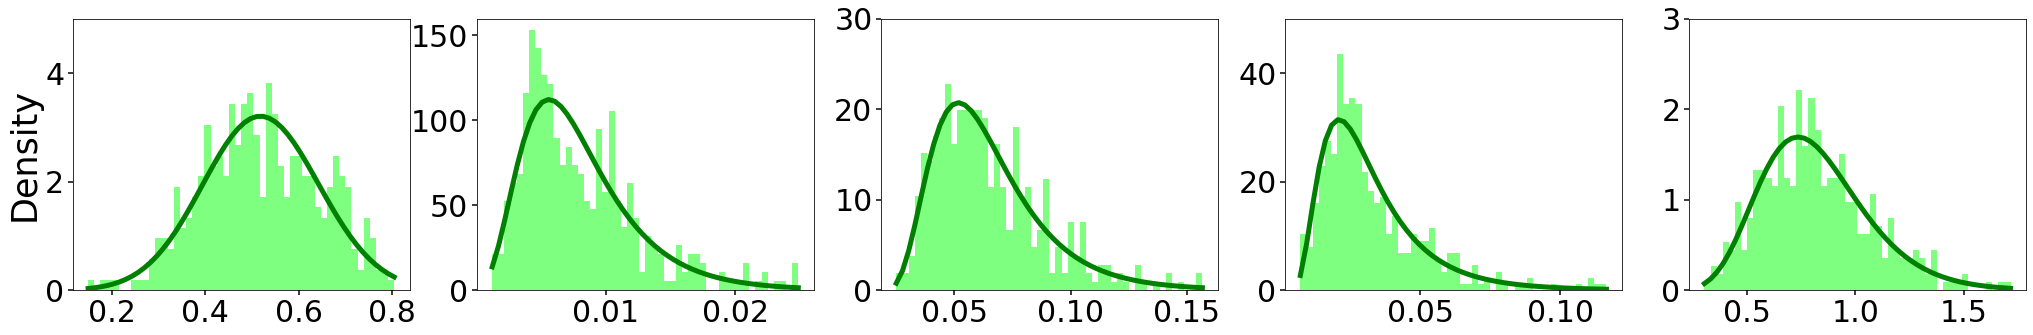

In [254]:
fig, ax = plt.subplots(1, 5, figsize=(35,5))

x0 = np.linspace(np.min(data_0), np.max(data_0))

ax[0].hist(data_0, bins=50, density=True, alpha=0.5, color='lime')
ax[0].plot(x0, lognorm.pdf(x0, shape_0, loc_0, scale_0), 'green', linewidth=5)
ax[0].set_ylabel('Density', fontsize=35)
ax[0].tick_params(axis='y', length=5, width=1.5, labelsize=30)
ax[0].tick_params(axis='x', length=5, width=1.5, labelsize=30)
ax[0].locator_params(axis='x', nbins=4)
ax[0].set_ylim([0,5])

x1 = np.linspace(np.min(data_1), np.max(data_1))

ax[1].hist(data_1, bins=50, density=True, alpha=0.5, color='lime')
ax[1].plot(x1, lognorm.pdf(x1, shape_1, loc_1, scale_1), 'green', linewidth=5)
ax[1].tick_params(axis='y', length=5, width=1.5, labelsize=30)
ax[1].tick_params(axis='x', length=5, width=1.5, labelsize=30)
ax[1].locator_params(axis='x', nbins=4)
ax[1].set_ylim([0,160])

x2 = np.linspace(np.min(data_2), np.max(data_2))

ax[2].hist(data_2, bins=50, density=True, alpha=0.5, color='lime')
ax[2].plot(x2, lognorm.pdf(x2, shape_2, loc_2, scale_2), 'green', linewidth=5)
ax[2].tick_params(axis='y', length=5, width=1.5, labelsize=30)
ax[2].tick_params(axis='x', length=5, width=1.5, labelsize=30)
ax[2].locator_params(axis='x', nbins=4)
ax[2].set_ylim([0,30])

x3 = np.linspace(np.min(data_3), np.max(data_3))

ax[3].hist(data_3, bins=50, density=True, alpha=0.5, color='lime')
ax[3].plot(x3, lognorm.pdf(x3, shape_3, loc_3, scale_3), 'green', linewidth=5)
ax[3].tick_params(axis='y', length=5, width=1.5, labelsize=30)
ax[3].tick_params(axis='x', length=5, width=1.5, labelsize=30)
ax[3].locator_params(axis='x', nbins=4)
ax[3].set_ylim([0,50])

x4 = np.linspace(np.min(data_4), np.max(data_4))

ax[4].hist(data_4, bins=50, density=True, alpha=0.5, color='lime')
ax[4].plot(x4, lognorm.pdf(x4, shape_4, loc_4, scale_4), 'green', linewidth=5)
ax[4].tick_params(axis='y', length=5, width=1.5, labelsize=30)
ax[4].tick_params(axis='x', length=5, width=1.5, labelsize=30)
ax[4].locator_params(axis='x', nbins=4)
ax[4].set_ylim([0,3])

plt.savefig('C:/Users/jales/Desktop/ff_patch_dists.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

In [248]:
data_0 = data_fs['dprvi_patch_7']
data_1 = data_fs['prvi_patch_7']
data_2 = data_fs['dpsvi_patch_7']
data_3 = data_fs['dpsvim_patch_7']
data_4 = data_fs['rvi_patch_7']

In [249]:
[shape_0, loc_0, scale_0] = lognorm.fit(data_0)
[shape_1, loc_1, scale_1] = lognorm.fit(data_1)
[shape_2, loc_2, scale_2] = lognorm.fit(data_2)
[shape_3, loc_3, scale_3] = lognorm.fit(data_3)
[shape_4, loc_4, scale_4] = lognorm.fit(data_4)

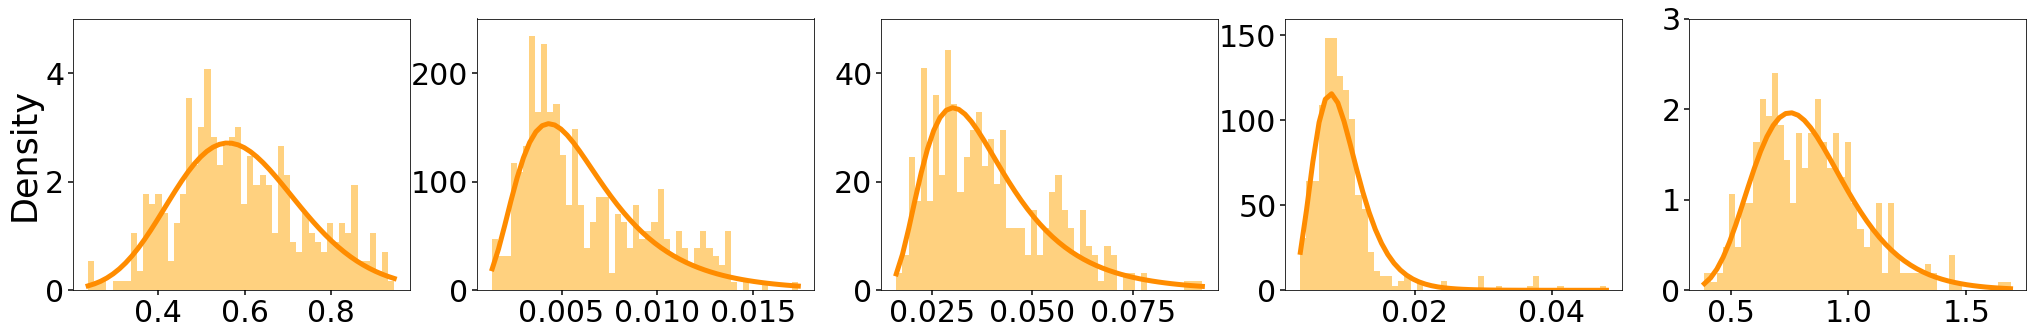

In [251]:
fig, ax = plt.subplots(1, 5, figsize=(35,5))

x0 = np.linspace(np.min(data_0), np.max(data_0))

ax[0].hist(data_0, bins=50, density=True, alpha=0.5, color='orange')
ax[0].plot(x0, lognorm.pdf(x0, shape_0, loc_0, scale_0), 'darkorange', linewidth=5)
ax[0].set_ylabel('Density', fontsize=35)
ax[0].tick_params(axis='y', length=5, width=1.5, labelsize=30)
ax[0].tick_params(axis='x', length=5, width=1.5, labelsize=30)
ax[0].locator_params(axis='x', nbins=4)
ax[0].set_ylim([0,5])

x1 = np.linspace(np.min(data_1), np.max(data_1))

ax[1].hist(data_1, bins=50, density=True, alpha=0.5, color='orange')
ax[1].plot(x1, lognorm.pdf(x1, shape_1, loc_1, scale_1), 'darkorange', linewidth=5)
ax[1].tick_params(axis='y', length=5, width=1.5, labelsize=30)
ax[1].tick_params(axis='x', length=5, width=1.5, labelsize=30)
ax[1].locator_params(axis='x', nbins=4)
ax[1].set_ylim([0,250])

x2 = np.linspace(np.min(data_2), np.max(data_2))

ax[2].hist(data_2, bins=50, density=True, alpha=0.5, color='orange')
ax[2].plot(x2, lognorm.pdf(x2, shape_2, loc_2, scale_2), 'darkorange', linewidth=5)
ax[2].tick_params(axis='y', length=5, width=1.5, labelsize=30)
ax[2].tick_params(axis='x', length=5, width=1.5, labelsize=30)
ax[2].locator_params(axis='x', nbins=4)
ax[2].set_ylim([0,50])

x3 = np.linspace(np.min(data_3), np.max(data_3))

ax[3].hist(data_3, bins=50, density=True, alpha=0.5, color='orange')
ax[3].plot(x3, lognorm.pdf(x3, shape_3, loc_3, scale_3), 'darkorange', linewidth=5)
ax[3].tick_params(axis='y', length=5, width=1.5, labelsize=30)
ax[3].tick_params(axis='x', length=5, width=1.5, labelsize=30)
ax[3].locator_params(axis='x', nbins=4)
ax[3].set_ylim([0,160])

x4 = np.linspace(np.min(data_4), np.max(data_4))

ax[4].hist(data_4, bins=50, density=True, alpha=0.5, color='orange')
ax[4].plot(x4, lognorm.pdf(x4, shape_4, loc_4, scale_4), 'darkorange', linewidth=5)
ax[4].tick_params(axis='y', length=5, width=1.5, labelsize=30)
ax[4].tick_params(axis='x', length=5, width=1.5, labelsize=30)
ax[4].locator_params(axis='x', nbins=4)
ax[4].set_ylim([0,3])

plt.savefig('C:/Users/jales/Desktop/fs_patch_dists.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

In [244]:
data_0 = data_fc['dprvi_patch_7']
data_1 = data_fc['prvi_patch_7']
data_2 = data_fc['dpsvi_patch_7']
data_3 = data_fc['dpsvim_patch_7']
data_4 = data_fc['rvi_patch_7']

In [245]:
[shape_0, loc_0, scale_0] = lognorm.fit(data_0)
[shape_1, loc_1, scale_1] = lognorm.fit(data_1)
[shape_2, loc_2, scale_2] = lognorm.fit(data_2)
[shape_3, loc_3, scale_3] = lognorm.fit(data_3)
[shape_4, loc_4, scale_4] = lognorm.fit(data_4)

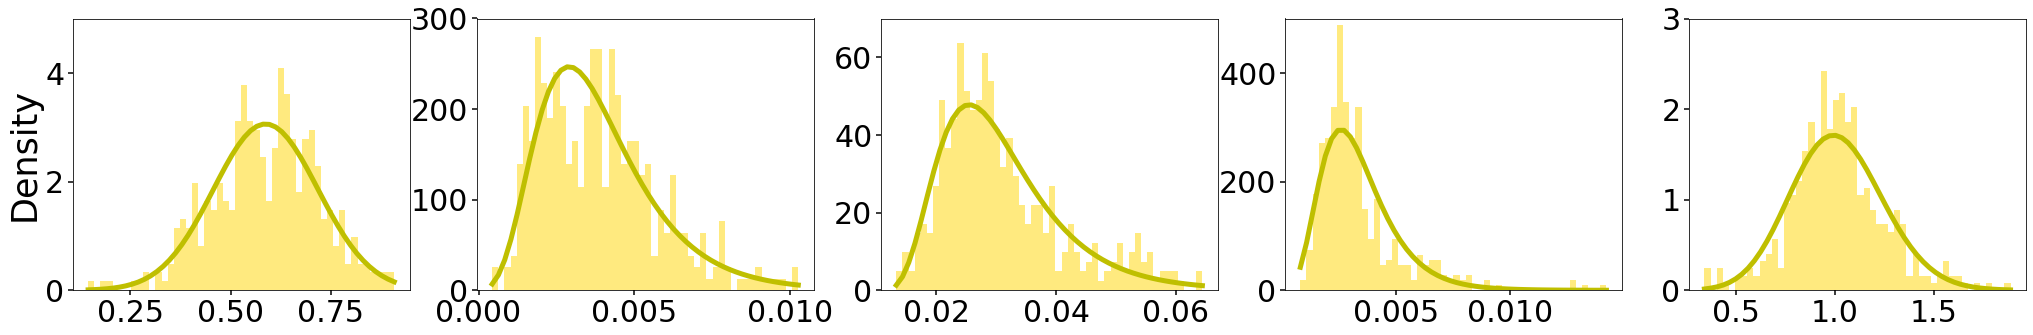

In [247]:
fig, ax = plt.subplots(1, 5, figsize=(35,5))

x0 = np.linspace(np.min(data_0), np.max(data_0))

ax[0].hist(data_0, bins=50, density=True, alpha=0.5, color='gold')
ax[0].plot(x0, lognorm.pdf(x0, shape_0, loc_0, scale_0), 'y', linewidth=5)
ax[0].set_ylabel('Density', fontsize=35)
ax[0].tick_params(axis='y', length=5, width=1.5, labelsize=30)
ax[0].tick_params(axis='x', length=5, width=1.5, labelsize=30)
ax[0].locator_params(axis='x', nbins=4)
ax[0].set_ylim([0,5])

x1 = np.linspace(np.min(data_1), np.max(data_1))

ax[1].hist(data_1, bins=50, density=True, alpha=0.5, color='gold')
ax[1].plot(x1, lognorm.pdf(x1, shape_1, loc_1, scale_1), 'y', linewidth=5)
ax[1].tick_params(axis='y', length=5, width=1.5, labelsize=30)
ax[1].tick_params(axis='x', length=5, width=1.5, labelsize=30)
ax[1].locator_params(axis='x', nbins=4)
ax[1].set_ylim([0,300])

x2 = np.linspace(np.min(data_2), np.max(data_2))

ax[2].hist(data_2, bins=50, density=True, alpha=0.5, color='gold')
ax[2].plot(x2, lognorm.pdf(x2, shape_2, loc_2, scale_2), 'y', linewidth=5)
ax[2].tick_params(axis='y', length=5, width=1.5, labelsize=30)
ax[2].tick_params(axis='x', length=5, width=1.5, labelsize=30)
ax[2].locator_params(axis='x', nbins=4)
ax[2].set_ylim([0,70])

x3 = np.linspace(np.min(data_3), np.max(data_3))

ax[3].hist(data_3, bins=50, density=True, alpha=0.5, color='gold')
ax[3].plot(x3, lognorm.pdf(x3, shape_3, loc_3, scale_3), 'y', linewidth=5)
ax[3].tick_params(axis='y', length=5, width=1.5, labelsize=30)
ax[3].tick_params(axis='x', length=5, width=1.5, labelsize=30)
ax[3].locator_params(axis='x', nbins=4)
ax[3].set_ylim([0,500])

x4 = np.linspace(np.min(data_4), np.max(data_4))

ax[4].hist(data_4, bins=50, density=True, alpha=0.5, color='gold')
ax[4].plot(x4, lognorm.pdf(x4, shape_4, loc_4, scale_4), 'y', linewidth=5)
ax[4].tick_params(axis='y', length=5, width=1.5, labelsize=30)
ax[4].tick_params(axis='x', length=5, width=1.5, labelsize=30)
ax[4].locator_params(axis='x', nbins=4)
ax[4].set_ylim([0,3])

plt.savefig('C:/Users/jales/Desktop/fc_patch_dists.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

In [137]:
mu_p = log(scale_p)
mu_q = log(scale_q)
#sigma_p = shape_p
#sigma_q = shape_q
var_p = np.power(shape_p, 2)
var_q = np.power(shape_q, 2)

m = data_p.count()
n = data_q.count()

# Kullback-Leibler distances (simmetrized)
dskl_ln = (var_p * np.power((mu_p - mu_q), 2) + var_q * np.power((mu_q - mu_p), 2) + np.power((var_p - var_q), 2)) / (4 * var_p * var_q)

s = ((2*m*n) / (m + n)) * dskl_ln # statistic

p_value = chi2.sf(s, df=2)

if p_value <= 0.05:
    print('Reject H0') # Reject H0
    
if p_value > 0.05:
    print('Accept H0') # Accept H0

m = matrix.shape[0]
idx = (np.arange(1, m+1) + (m+1) * np.arange(m - 1)[:, None]).reshape(m, -1)
out = matrix.ravel()[idx]

rate = round((out.sum() / (out.shape[0]*out.shape[1])) * 100, 2)

NameError: name 'scale_p' is not defined

In [ ]:
# kp = a_p
# kq = a_q
# thetap = scale_p
# thetaq = scale_q

# dskl_ln = ((mup - muq)^2)/(2 * (sigma_p^2) * (sigma_q^2))

# dskl_g = ((kp - kq) * (psi(kp) + log(thetap) - psi(kq) - log(thetaq)) + ((kp*thetap - kq*thetaq) * ((thetap - thetaq) / (thetap * thetaq)))) / 2

# m = data_p.count()
# n = data_q.count()
# v = 1

# s = ((2*m*n*v) / (m + n)) * dskl_kn
 
# p_value = chi2.sf(s, df=2)

# if p_value <= 0.05:
#     print('Reject H0')

In [6]:
from scipy.stats import lognorm
import numpy as np
import pandas as pd
import os

In [7]:
files_path = 'D:/thesis_data/VEG_INDICES/samples/stratified/florestal/20m/'

files_list = os.listdir(files_path)

In [8]:
for index, file in enumerate(files_list):
    
    samples = pd.read_csv(files_path + file)

    dprvi_patches = samples.filter(regex='^dprvi_patch', axis=1)
    prvi_patches = samples.filter(regex='^prvi_patch', axis=1)
    dpsvi_patches = samples.filter(regex='^dpsvi_patch', axis=1)
    dpsvim_patches = samples.filter(regex='^dpsvim_patch', axis=1)
    rvi_patches = samples.filter(regex='^rvi_patch', axis=1)

    date = files_list[index].split('_')[1]

    print(date)

20170112
20170124
20170205
20170217
20170301
20170313
20170325
20170406
20170418
20170430
20170512
20170524
20170605
20170617
20170629
20170711
20170723
20170804
20170816
20170828
20170909
20170921
20171003
20171015
20171027
20171108
20171120
20171202
20171214
20171226
20180107
20180119
20180131
20180212
20180224
20180308
20180320
20180401
20180413
20180425
20180507
20180519
20180612
20180624
20180718
20180730
20180811
20180823
20180904
20180916
20180928
20181010
20181022
20181103
20181115
20181127
20181209
20181221
20190102
20190114
20190126
20190207
20190219
20190303
20190315
20190327
20190408
20190420
20190502
20190514
20190526
20190607
20190619
20190701
20190713
20190725
20190806
20190818
20190830
20190911
20190923
20191005
20191017
20191029
20191110
20191122
20191204
20191216
20191228
20200109
20200121
20200202
20200214
20200226
20200309
20200321
20200402
20200414
20200426
20200508
20200520
20200601
20200613
20200625
20200707
20200719
20200731
20200812
20200824
20200905
20200917
2

In [8]:
ff_dataset = 'D:/thesis_data/VEG_INDICES/lognorm_params/florestal/FF_20200917_ln_params.csv'
fs_dataset = 'D:/thesis_data/VEG_INDICES/lognorm_params/savanica/FS_20200917_ln_params.csv'
fc_dataset = 'D:/thesis_data/VEG_INDICES/lognorm_params/campestre/FC_20200917_ln_params.csv'

In [9]:
ff_df = pd.read_csv(ff_dataset)
fs_df = pd.read_csv(fs_dataset)
fc_df = pd.read_csv(fc_dataset)

In [12]:
matrix_shape = [len(ff_df.index), len(ff_df.index)]

matrix = np.zeros(matrix_shape)

for i in fs_df.index:
    for j in fc_df.index:
        
        mu_p = log(ff_df.dprvi_scale[i])
        mu_q = log(ff_df.dprvi_scale[j])

        var_p = np.power(ff_df.dprvi_shape[i], 2)
        var_q = np.power(ff_df.dprvi_shape[j], 2)

        m = 400
        n = 400

        # Kullback-Leibler distances (simmetrized)
        dskl_ln = (var_p * np.power((mu_p - mu_q), 2) + var_q * np.power((mu_q - mu_p), 2) + np.power((var_p - var_q), 2)) / (4 * var_p * var_q)

        s = ((2*m*n) / (m + n)) * dskl_ln # statistic

        p_value = chi2.sf(s, df=2)

        if p_value <= 0.05:
            matrix[i, j] = 1
            
        if p_value > 0.05:
            matrix[i, j] = 0

m = matrix.shape[0]
idx = (np.arange(1, m+1) + (m+1) * np.arange(m - 1)[:, None]).reshape(m, -1)
out = matrix.ravel()[idx]

rate = round((out.sum() / (out.shape[0]*out.shape[1])) * 100, 2)
print(rate)

99.59


In [241]:
class1_path = 'D:/thesis_data/VEG_INDICES/lognorm_params/savanica/'
class2_path = 'D:/thesis_data/VEG_INDICES/lognorm_params/campestre/'

data = {}

index_list = ['dprvi', 'prvi','dpsvi', 'dpsvim', 'rvi']

for id, _ in enumerate(os.listdir(class1_path)):

    class1_df = pd.read_csv(class1_path + os.listdir(class1_path)[id])
    class2_df = pd.read_csv(class2_path + os.listdir(class2_path)[id])
    
    for index in index_list:
        
        class1_shape = class1_df.filter(regex=f'^{index}_shape', axis=1).values
        class1_scale = class1_df.filter(regex=f'^{index}_scale', axis=1).values

        class2_shape = class2_df.filter(regex=f'^{index}_shape', axis=1).values
        class2_scale = class2_df.filter(regex=f'^{index}_scale', axis=1).values

        matrix = np.zeros([len(class1_shape), len(class2_shape)])

        if index not in data:
            data[index] = []

        for i in class1_df.index:
            for j in class2_df.index:

                mu_p = log(class1_scale[i])
                mu_q = log(class2_scale[j])

                var_p = np.power(class1_shape[i], 2)
                var_q = np.power(class2_shape[j], 2)

                m = 400
                n = 400

                # Kullback-Leibler distances (simmetrized)
                dskl_ln = (var_p * np.power((mu_p - mu_q), 2) + var_q * np.power((mu_q - mu_p), 2) + np.power((var_p - var_q), 2)) / (4 * var_p * var_q)

                s = ((2*m*n) / (m + n)) * dskl_ln # statistic

                p_value = chi2.sf(s, df=2)

                if p_value <= 0.05:
                    matrix[i, j] = 1
                    
                if p_value > 0.05:
                    matrix[i, j] = 0
        
        m = matrix.shape[0]
        idx = (np.arange(1, m+1) + (m+1) * np.arange(m - 1)[:, None]).reshape(m, -1)
        out = matrix.ravel()[idx]

        rate = round((out.sum() / (out.shape[0]*out.shape[1])) * 100, 2)
    
        data[index].append(rate)
        
result = pd.DataFrame(data)

In [242]:
result.head(50)

,dprvi,prvi,dpsvi,dpsvim,rvi
0,0.9976,0.9572,0.9676,0.9868,0.9820
1,0.9996,0.9228,0.9596,0.9728,0.9900
2,0.9984,0.9412,0.9668,0.9860,0.9820
3,0.9984,0.9228,0.9468,0.9828,0.9896
4,0.9996,0.9180,0.9488,0.9664,0.9908
5,0.9996,0.9364,0.9524,0.9936,0.9784
6,0.9980,0.9472,0.9624,0.9932,0.9828
7,0.9996,0.9272,0.9520,0.9800,0.9828
8,0.9964,0.9544,0.9676,0.9892,0.9872
9,0.9984,0.9352,0.9580,0.9792,0.9856


In [243]:
output_path = 'D:/thesis_data/VEG_INDICES/rates/'

result.to_csv(output_path + 'FS_FC_rates.csv', sep=',', index=False)